In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pylab as plt
from datetime import datetime
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6
from pmdarima.arima import auto_arima


In [5]:
dataparse = lambda dates: datetime.strptime(dates, '%Y-%m')
db = pd.read_csv('AirPassengers.csv', parse_dates=['Month'], index_col='Month', date_parser=dataparse)
db.head()

/tmp/ipykernel_40025/2200325955.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  db = pd.read_csv('AirPassengers.csv', parse_dates=['Month'], index_col='Month', date_parser=dataparse)


,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


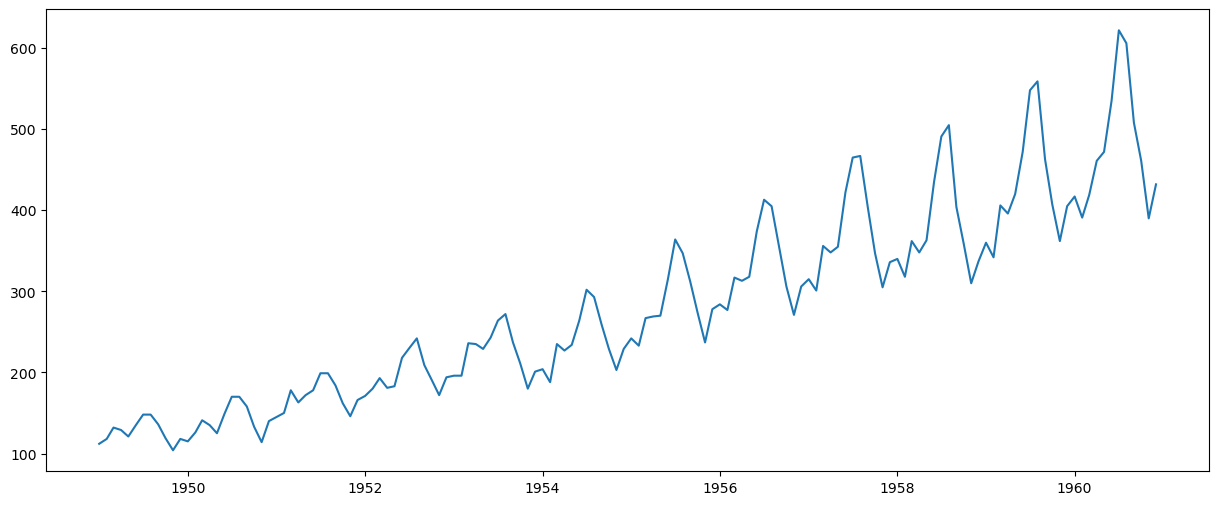

In [6]:
plt.plot(db)

In [9]:
step_wise_model = auto_arima(db, start_p=1, start_q=1, start_d=0,
                             max_p=3, max_q=3, m=12,
                             start_P=0, seasonal=True,
                             d=1, D=1, trace=True,
                             stepwise=False)

 ARIMA(0,1,0)(0,1,0)[12]             : AIC=1031.508, Time=0.02 sec
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=1030.752, Time=0.09 sec
 ARIMA(0,1,0)(0,1,2)[12]             : AIC=1032.276, Time=0.19 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=1030.408, Time=0.04 sec
 ARIMA(0,1,0)(1,1,1)[12]             : AIC=1032.128, Time=0.12 sec
 ARIMA(0,1,0)(1,1,2)[12]             : AIC=1034.096, Time=0.27 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=1032.120, Time=0.10 sec
 ARIMA(0,1,0)(2,1,1)[12]             : AIC=inf, Time=0.75 sec
 ARIMA(0,1,0)(2,1,2)[12]             : AIC=inf, Time=1.23 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=1020.639, Time=0.03 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=1021.003, Time=0.13 sec
 ARIMA(0,1,1)(0,1,2)[12]             : AIC=1019.494, Time=0.24 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=1020.425, Time=0.07 sec
 ARIMA(0,1,1)(1,1,1)[12]             : AIC=1020.327, Time=0.26 sec
 ARIMA(0,1,1)(1,1,2)[12]             : AIC=1012.991, Time=0.70 sec
 ARIM

In [10]:
print(step_wise_model.aic())

1012.9907966967884


In [11]:
treino = db.loc['1949-01-01':'1959-12-01']
treino

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1959-08-01,559
1959-09-01,463
1959-10-01,407


In [13]:
test = db.loc['1960-01-01':]
test

,#Passengers
Month,
1960-01-01,417
1960-02-01,391
1960-03-01,419
1960-04-01,461
1960-05-01,472
1960-06-01,535
1960-07-01,622
1960-08-01,606
1960-09-01,508


In [14]:
step_wise_model.fit(treino)

ARIMA(order=(0, 1, 1), scoring_args={}, seasonal_order=(1, 1, 2, 12),
      suppress_warnings=True, with_intercept=False)

In [16]:
prev = step_wise_model.predict(n_periods=len(test))
prev

1960-01-01    420.241343
1960-02-01    398.458714
1960-03-01    461.912959
1960-04-01    450.693095
1960-05-01    474.013075
1960-06-01    537.920381
1960-07-01    612.244894
1960-08-01    623.603047
1960-09-01    520.175117
1960-10-01    462.325735
1960-11-01    412.938984
1960-12-01    453.761887
Freq: MS, dtype: float64

In [18]:
prev = pd.DataFrame(prev,index = test.index,columns=['Predictions'])
prev

,Predictions
Month,
1960-01-01,420.241343
1960-02-01,398.458714
1960-03-01,461.912959
1960-04-01,450.693095
1960-05-01,474.013075
1960-06-01,537.920381
1960-07-01,612.244894
1960-08-01,623.603047
1960-09-01,520.175117


<Axes: xlabel='Month'>

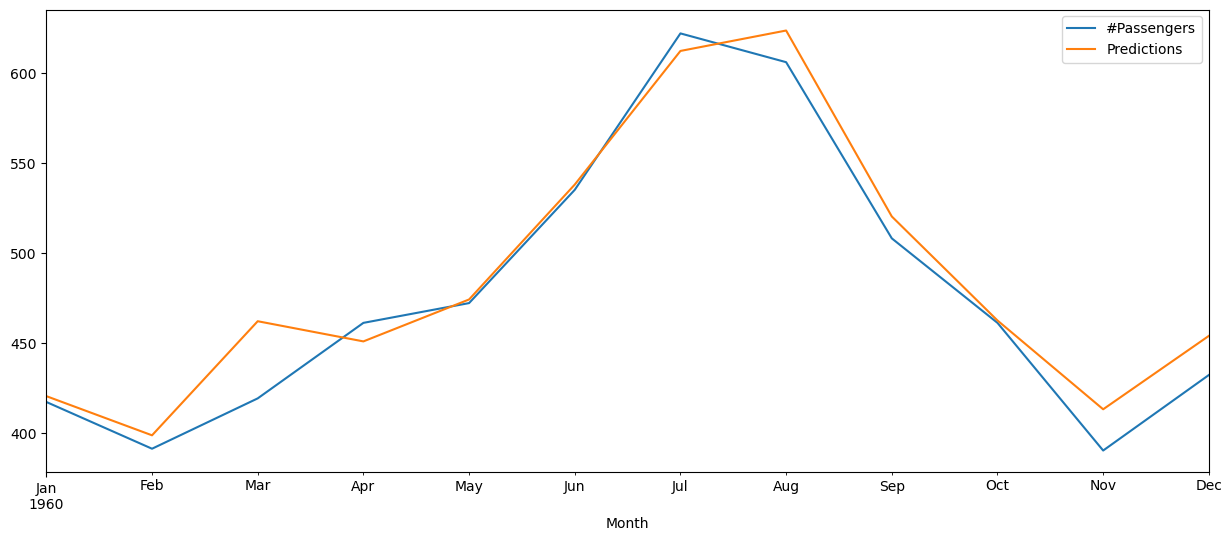

In [19]:
pd.concat([test, prev], axis=1).plot()

<Axes: xlabel='Month'>

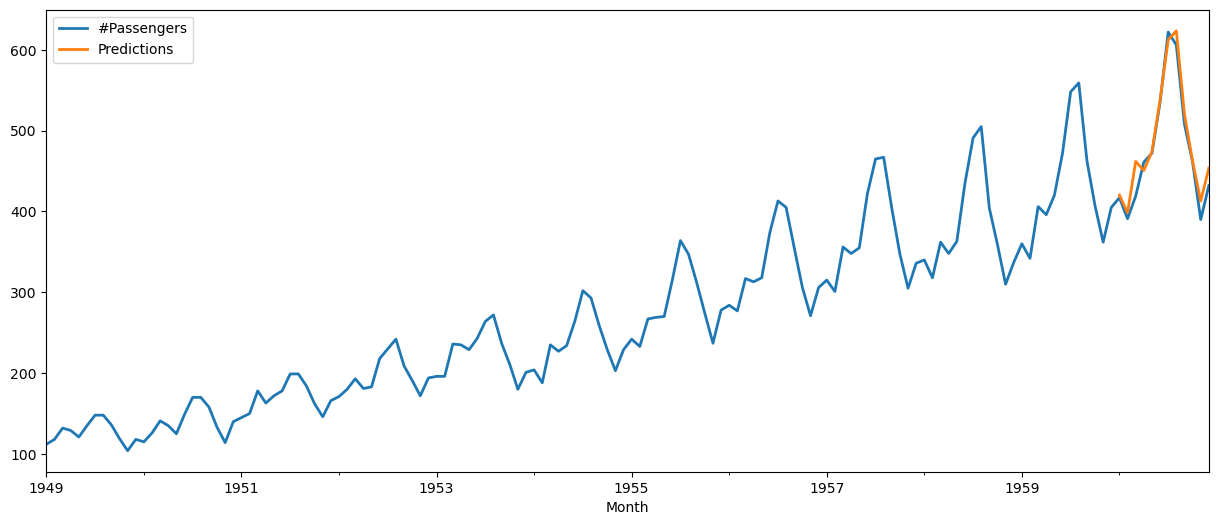

In [25]:
pd.concat([db, prev], axis=1).plot(linewidth=2)